## Title - Email Spam Detection

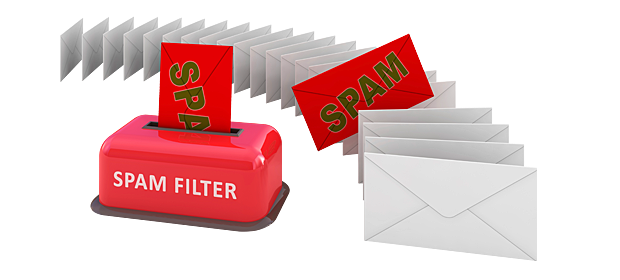

### Steps to Follow:

- Introduction 
- Objective 
- Data Checks to perform
- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Conclusion

### 1. Introduction:
#### This Kaggle notebook presents a step-by-step guide to building an efficient SMS spam classification model using the SMS Spam Collection dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted messages and ensure that your text messaging experience is smoother and safer.

### 2. Objective:
#### The goal of this project is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or legitimate (ham).

#### Import the relevant Libraies

In [1]:
# Importing necessory Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load the Data

In [2]:
df = pd.read_csv('D:/My Gigs/CodeSoft/DataSet/spam.csv', encoding='latin1')


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

### 3. Data Checks to Perform

In [6]:
df.rename(columns= {'v1':'target', 'v2':'text'}, inplace =True)

In [7]:
# Convert the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
# Check Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check Duplicate values
df.duplicated().sum()

403

In [10]:
# Remove Duplicate values
df = df.drop_duplicates(keep = 'first')

In [11]:
df.shape

(5169, 2)

### 4. Exploratory Data Analysis (EDA)

In [12]:
values = df['target'].value_counts(normalize= True)
values * 100

0    87.366996
1    12.633004
Name: target, dtype: float64

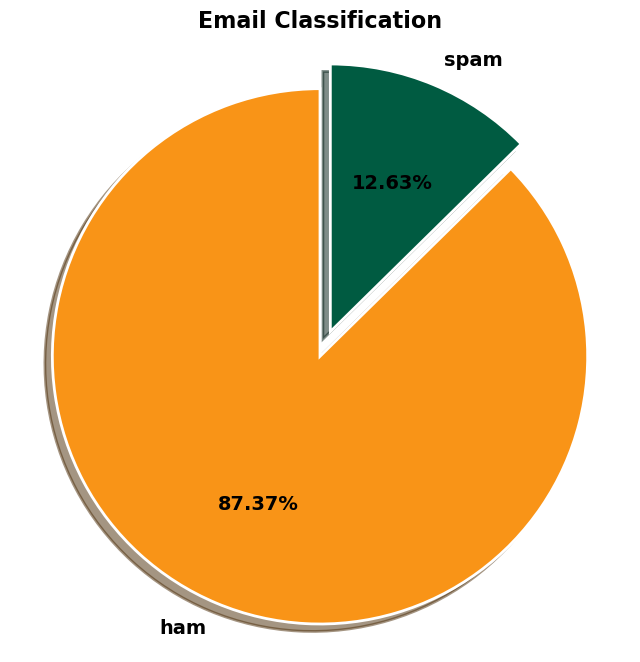

In [13]:
colors = ['#F99417', '#005B41']  # Define the color 
explode = (0, 0.1) # Explode the second slice (spam) by 10%

fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white') 

# Create the pie chart with custom colors, labels, explode parameter
wedges, texts, autotexts = ax.pie(values, labels = ['ham', 'spam'],
                                 autopct='%0.2f%%',
                                 startangle = 90,
                                 colors = colors,
                                 wedgeprops = {'linewidth':2, 'edgecolor': 'white'},
                                 explode = explode,
                                 shadow = True
                                 )

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight = 'bold')
    autotext.set(size=14, weight = 'bold')
    
# Add a title
ax.set_title('Email Classification', fontsize = 16, fontweight = 'bold')

# Equal aspect ratio ensure that pie is drawn as a circle
ax.axis('equal')

# show the pie chart
plt.show()

#### Text Length and Structure Analysis

In [14]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Character Length Distribution for Legitimate and Spam Messages

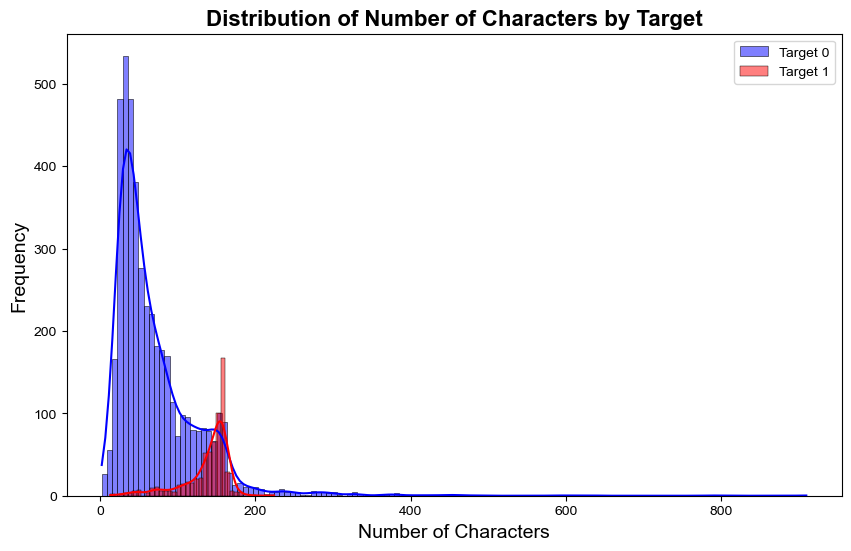

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))

# Plot the histogram for target 0 
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'blue', label = 'Target 0', kde = True)

# Plot the histogram for target 1
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red', label = 'Target 1', kde = True)

# Add labels and a title
plt.xlabel("Number of Characters", fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Distribution of Number of Characters by Target", fontsize = 16, fontweight = 'bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style = 'whitegrid') # Add a white grid background

# Show the plot
plt.show()

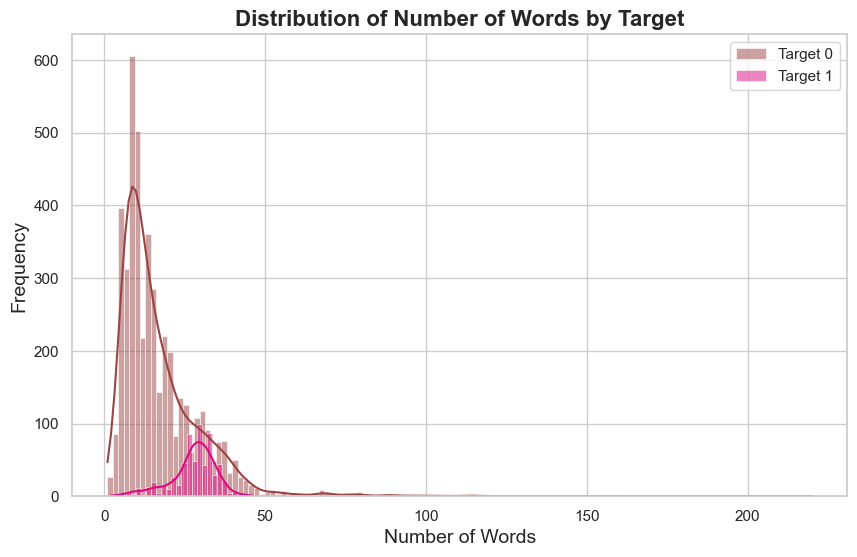

In [18]:
plt.figure(figsize = (10,6))

# Plot the histogram for target 0 
sns.histplot(df[df['target'] == 0]['num_words'], color = '#9A4444', label = 'Target 0', kde = True)

# Plot the histogram for target 1
sns.histplot(df[df['target'] == 1]['num_words'], color = '#DA0C81', label = 'Target 1', kde = True)

# Add labels and a title
plt.xlabel("Number of Words", fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Distribution of Number of Words by Target", fontsize = 16, fontweight = 'bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style = 'whitegrid') # Add a white grid background

# Show the plot
plt.show()

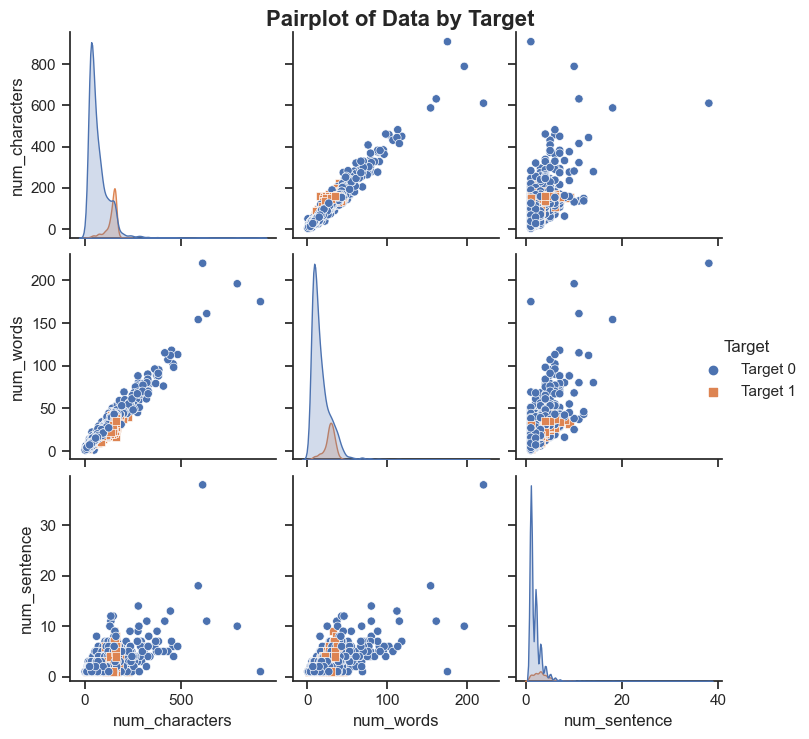

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

In [20]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


#### Heatmap

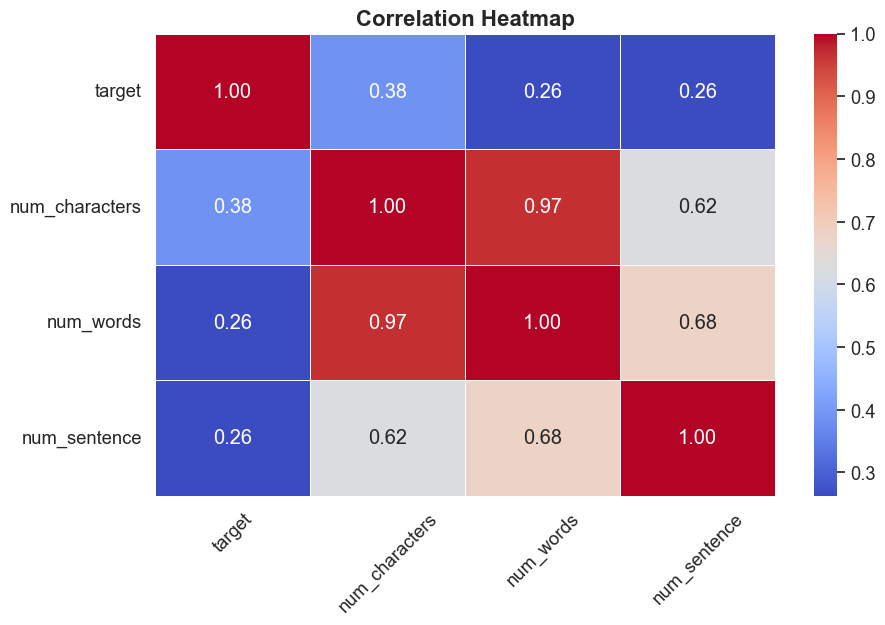

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation = 0)

# Show the heatmap
plt.show()

### 6. Text Preprocessing

In [22]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    
   # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [23]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [24]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

#### Word Cloud for Spam Messages

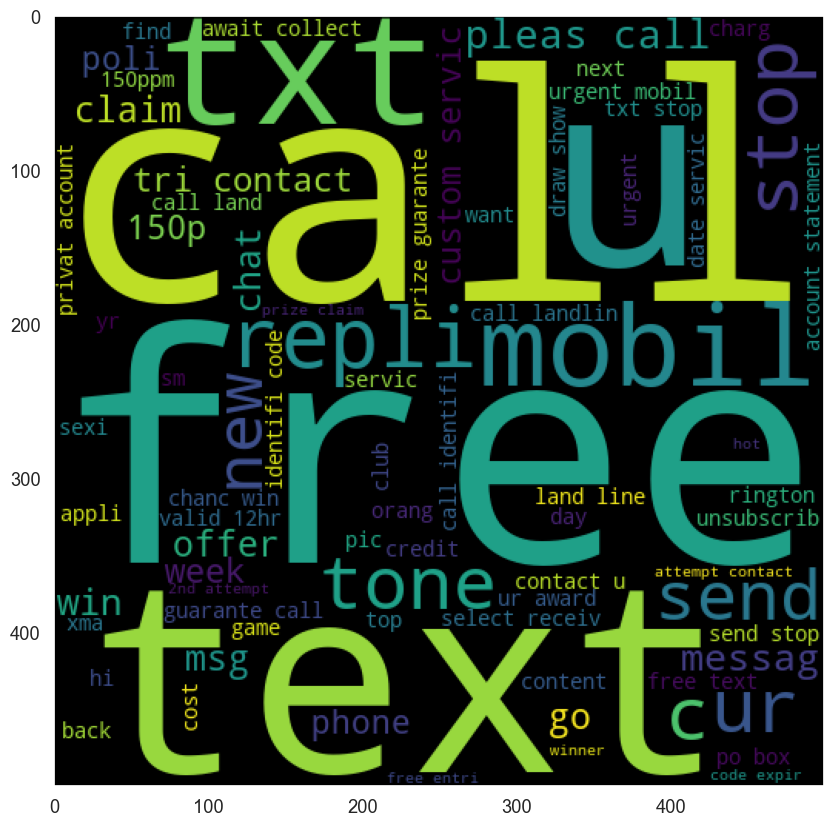

In [25]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10,10))
plt.imshow(spam_wc)
plt.grid(None)
plt.show()


#### Word Cloud for Not spam Messages

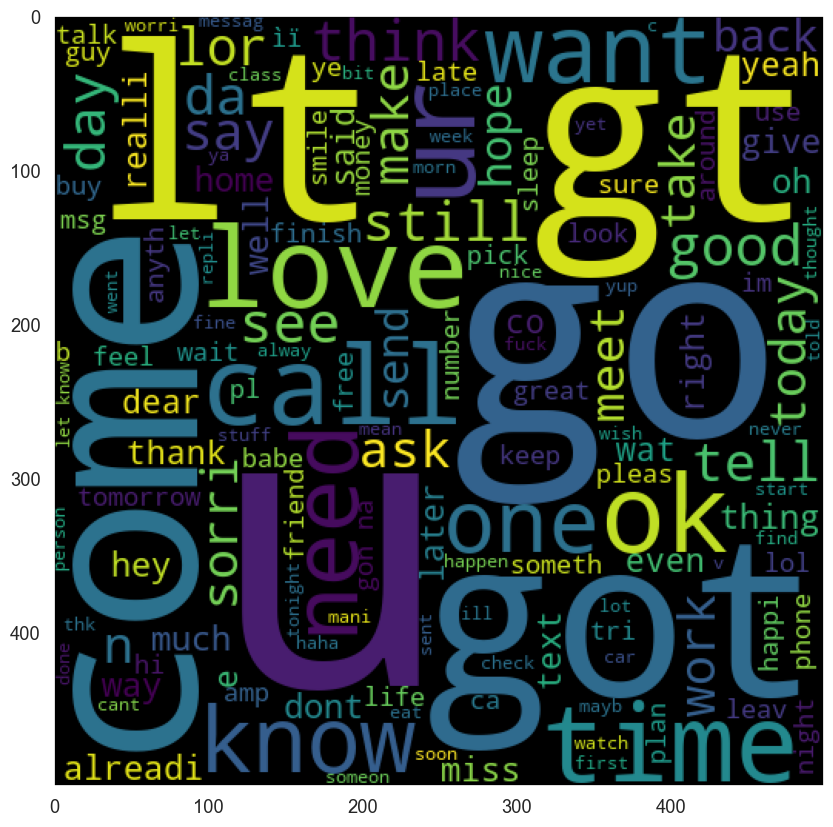

In [26]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10,10))
plt.imshow(ham_wc)
plt.grid(None)
plt.show()

In [27]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [28]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))


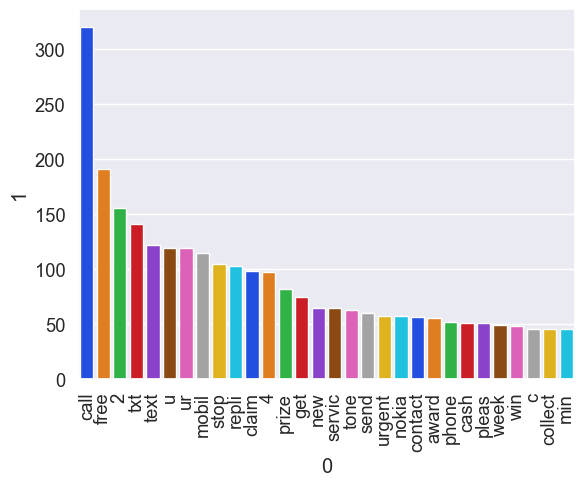

In [29]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()


In [30]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [31]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

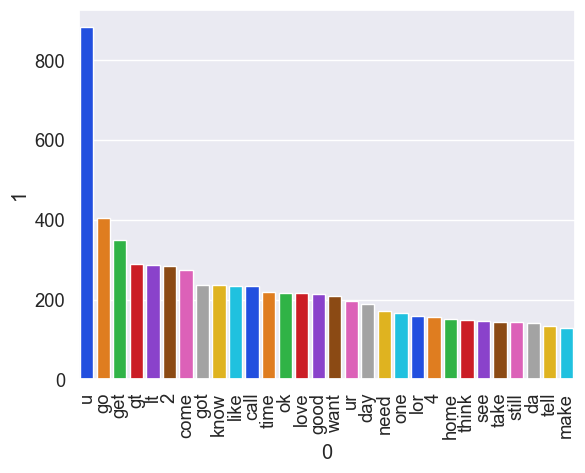

In [32]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [34]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

### 6. Model Building

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [38]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [39]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [40]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9709864603481625
Precision:  1.0

For:  DT
Accuracy:  0.9294003868471954
Precision:  0.8282828282828283

For:  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703

For:  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829

For:  Adaboost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089

For:  Bgc
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659

For:  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406

For:  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192

For:  xgb
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213


### Conclusion: 

#### In our evaluation of various classification algorithms, we observed the following key insights:
        
Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97.58%.
Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from 94.68% to 96.03%.

The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice.